# Initial Data Exploration for Mumbai Flood Vulnerability

This notebook explores the initial datasets collected for the Mumbai flood vulnerability assessment project.

In [1]:
# Import necessary libraries
import os
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import rasterio
from rasterio.plot import show
import seaborn as sns
# Set plot style
sns.set_style('whitegrid')
sns.set_context("notebook", font_scale=1.5)

## 1. Exploring Administrative Boundaries

In [2]:
# Load Mumbai boundary data (if available)
boundary_path = "../data/raw/boundaries/mumbai_test_boundary.shp"

if os.path.exists(boundary_path):
    mumbai_boundary = gpd.read_file(boundary_path)
    print(f"CRS: {mumbai_boundary.crs}")
    print(f"Number of features: {len(mumbai_boundary)}")
    
    # Plot the boundary
    fig, ax = plt.subplots(figsize=(10, 10))
    mumbai_boundary.plot(ax=ax)
    ax.set_title("Mumbai Administrative Boundary")
    plt.show()
else:
    print("Boundary file not found. Please run data acquisition scripts first.")

Boundary file not found. Please run data acquisition scripts first.


## 2. Exploring Elevation Data

CRS: EPSG:4326
Bounds: BoundingBox(left=72.75, bottom=18.85, right=73.05, top=19.25)
Resolution: (0.001, 0.001)
Dimensions: 300 x 400


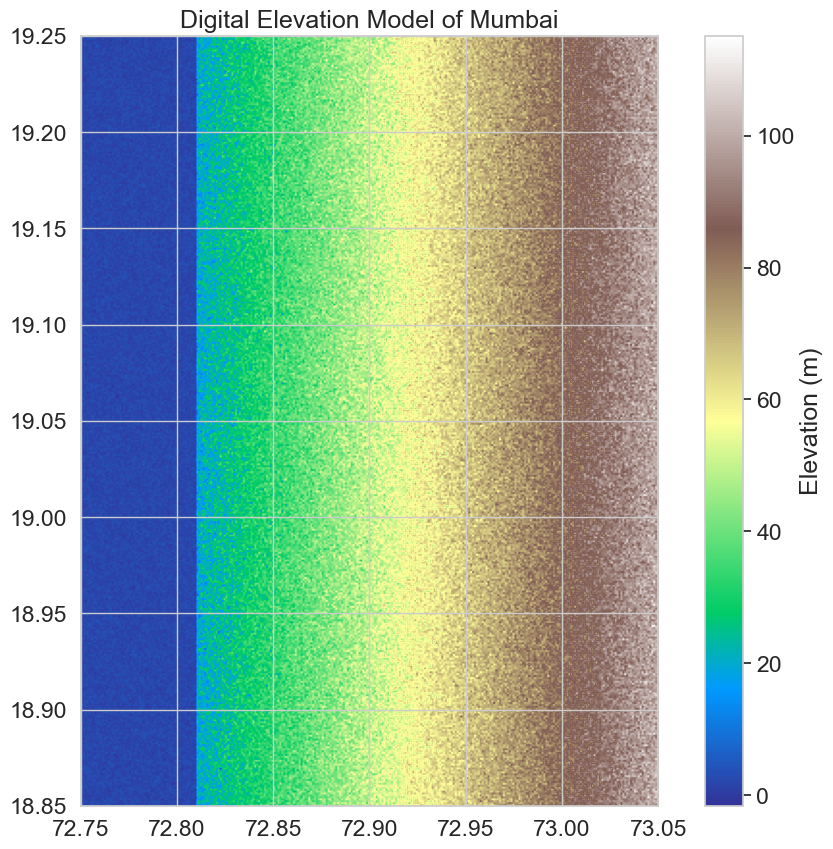

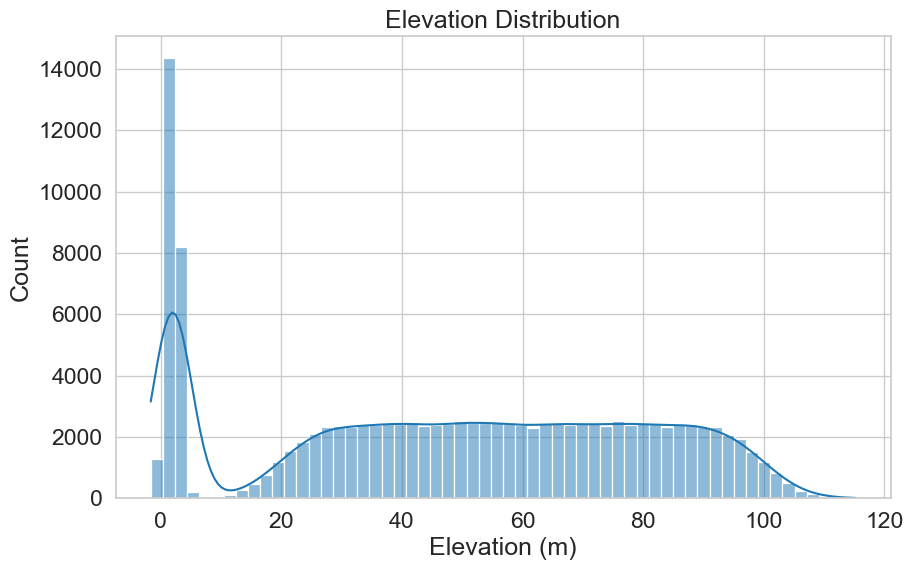

In [3]:
# Load DEM data if available
dem_path = "../data/raw/dem/mumbai_dem.tif"

if os.path.exists(dem_path):
    with rasterio.open(dem_path) as src:
        print(f"CRS: {src.crs}")
        print(f"Bounds: {src.bounds}")
        print(f"Resolution: {src.res}")
        print(f"Dimensions: {src.width} x {src.height}")
        
        # Read the raster data
        dem_data = src.read(1)
        
        # Plot the DEM
        fig, ax = plt.subplots(figsize=(12, 10))
        show(src, ax=ax, cmap='terrain')
        ax.set_title("Digital Elevation Model of Mumbai")
        plt.colorbar(ax.images[0], ax=ax, label='Elevation (m)')
        plt.show()
        
        # Plot elevation histogram
        fig, ax = plt.subplots(figsize=(10, 6))
        # Filter out nodata values
        valid_data = dem_data[dem_data != src.nodata]
        sns.histplot(valid_data.flatten(), kde=True, ax=ax)
        ax.set_title("Elevation Distribution")
        ax.set_xlabel("Elevation (m)")
        plt.show()
else:
    print("DEM file not found. Please download elevation data first.")